### Import libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Đọc dữ liệu

In [114]:
dataset_path = './data/titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


### Chia biến X, y

In [115]:
x = df.drop(columns=['Survived']).to_numpy()
y = df['Survived'].to_numpy()

### Thêm bias vào X

In [116]:
length_df = x.shape[0]
x_b = np.hstack((np.ones((length_df, 1)), x))
x_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

### Chia tập train, val, test

In [117]:
test_size = 0.125
val_size = 0.2
random_state = 2
is_shuffle = True
x_train, x_val, y_train, y_val = train_test_split(
    x_b, y, test_size=val_size, random_state=2, shuffle=is_shuffle)

x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

### Chuẩn hóa dữ liệu

In [118]:
scaler = StandardScaler()
x_train[:, 1:] = scaler.fit_transform(x_train[:, 1:])
x_val[:, 1:] = scaler.transform(x_val[:, 1:])
x_test[:, 1:] = scaler.transform(x_test[:, 1:])

### Cài đặt các hàm quan trọng

np.clip(array, min_value, max_value), trong đó:

- array là mảng cần giới hạn giá trị.
- min_value là giá trị nhỏ nhất mà phần tử của mảng có thể có.
- max_value là giá trị lớn nhất mà phần tử của mảng có thể có.

In [119]:
def predict(theta, x):
    z = np.dot(x, theta)
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    L = (-y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)).mean()
    return L

def compute_gradient(x, y_hat, y):
    gradient = np.dot(x.T, (y_hat - y)) / len(y)
    return gradient    

def update_parameters(theta, lr, gradient):
    new_theta = theta - lr*gradient

    return new_theta

def compute_accuracy(x, y, theta):
    label = predict(theta, x).round()
    acc = (label == y).mean()
    return acc

### Khai báo các siêu tham số và khởi tạo weights

In [120]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
# uniform random từ 0 - 1
theta = np.random.uniform(
    size=x_train.shape[1]
)

### Huấn luyện mô hình

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []


for epoch in range(epochs):
    accuracy_batch_val = []
    accuracy_batch_train = []
    loss_batch_val = []
    loss_batch_train = []
    for i in range(0, x_train.shape[0], batch_size):
        x_batch_train = x_train[i:i + batch_size]
        y_batch_train = y_train[i:i + batch_size]

        y_hat = predict(theta=theta, x=x_batch_train)
        gradient = compute_gradient(x_batch_train, y_hat, y_batch_train)
        theta = update_parameters(theta, lr, gradient)

        loss_batch_train.append(compute_loss(y_hat, y_batch_train))
        accuracy_batch_train.append(compute_accuracy(x_train, y_train, theta))

        y_hat_val = predict(theta=theta, x=x_val)
        loss_batch_val.append(compute_loss(y_hat_val, y_val))
        accuracy_batch_val.append(compute_accuracy(x_val, y_val, theta))

    train_batch_loss = sum(loss_batch_train) / len(loss_batch_train)
    val_batch_loss = sum(loss_batch_val) / len(loss_batch_val)
    train_batch_acc = sum(accuracy_batch_train) / len(accuracy_batch_train)
    val_batch_acc = sum(accuracy_batch_val) / len(accuracy_batch_val)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(
        f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")

        


EPOCH 1:	Training loss: 0.759	Validation loss: 0.631	Training accuracy: 0.621	Validation accuracy: 0.687

EPOCH 2:	Training loss: 0.804	Validation loss: 0.657	Training accuracy: 0.602	Validation accuracy: 0.687

EPOCH 3:	Training loss: 0.854	Validation loss: 0.688	Training accuracy: 0.586	Validation accuracy: 0.665

EPOCH 4:	Training loss: 0.912	Validation loss: 0.724	Training accuracy: 0.562	Validation accuracy: 0.659

EPOCH 5:	Training loss: 0.977	Validation loss: 0.768	Training accuracy: 0.546	Validation accuracy: 0.637

EPOCH 6:	Training loss: 1.052	Validation loss: 0.820	Training accuracy: 0.530	Validation accuracy: 0.587

EPOCH 7:	Training loss: 1.137	Validation loss: 0.882	Training accuracy: 0.459	Validation accuracy: 0.486

EPOCH 8:	Training loss: 1.235	Validation loss: 0.957	Training accuracy: 0.411	Validation accuracy: 0.436

EPOCH 9:	Training loss: 1.347	Validation loss: 1.047	Training accuracy: 0.363	Validation accuracy: 0.408

EPOCH 10:	Training loss: 1.476	Validation los

### Đánh giá mô hình

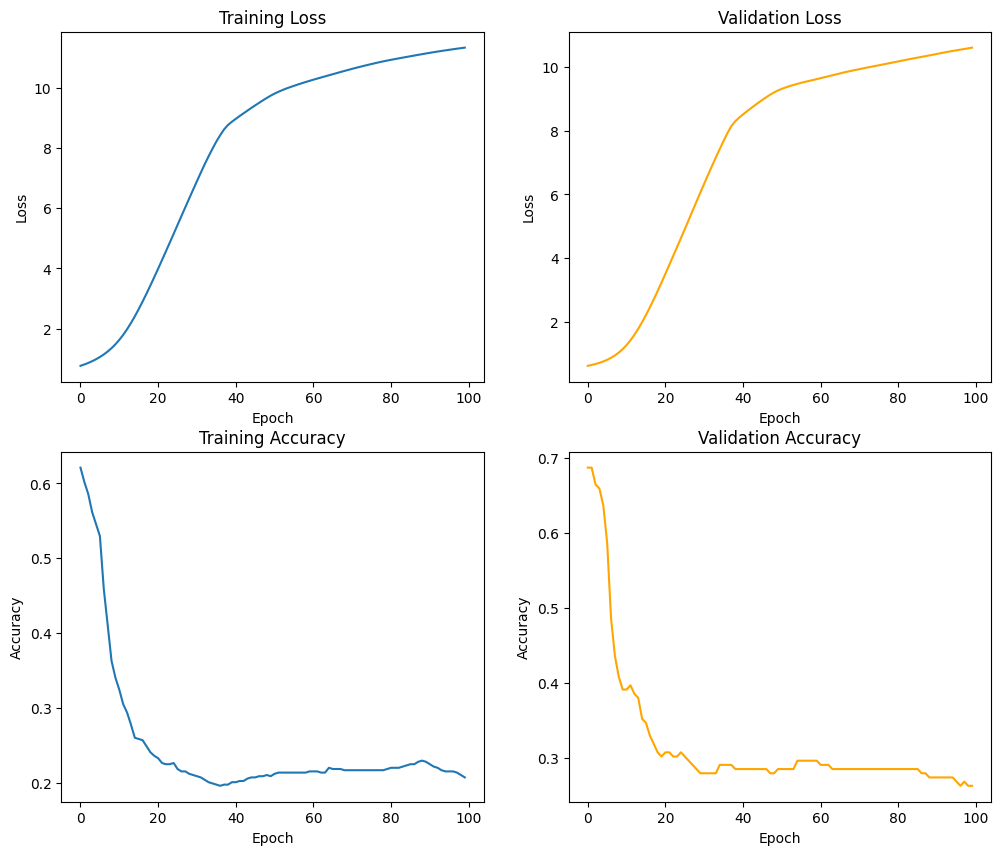

In [122]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()
